In [1]:
from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType

import matplotlib.pyplot as plt
import numpy as np

## Original Perfect Foresight Example

In [2]:
PFexample = PerfForesightConsumerType()
PFexample.cycles = 0

SimulationParams = {
    "AgentCount": 3,  # Number of agents of this type
    "T_sim": 120,  # Number of periods to simulate
    "aNrmInitMean": -6.0,  # Mean of log initial assets
    "aNrmInitStd": 0,  # 1.0,  # Standard deviation of log initial assets
    "pLvlInitMean": 0.0,  # Mean of log initial permanent income
    "pLvlInitStd": 0.0,  # Standard deviation of log initial permanent income
    "PermGroFacAgg": 1.0,  # Aggregate permanent income growth factor
    "T_age": None,  # Age after which simulated agents are automatically killed,
    "LivPrb": [0.98],
}

PFexample.assign_parameters(**SimulationParams)

In [3]:
PFexample.solve()

In [4]:
PFexample

<HARK.ConsumptionSaving.ConsIndShockModel.PerfForesightConsumerType object at 0x7f6482eab190.
Parameters:
cycles: 1
CRRA: 2.0
Rfree: 1.03
DiscFac: 0.96
LivPrb: [0.98]
PermGroFac: [1.01]
BoroCnstArt: None
MaxKinks: 400
AgentCount: 3
aNrmInitMean: -6.0
aNrmInitStd: 0
pLvlInitMean: 0.0
pLvlInitStd: 0.0
PermGroFacAgg: 1.0
T_age: None
T_cycle: 1
PerfMITShk: False
T_sim: 120>

In [5]:
PFexample.track_vars = ["who_dies", "mNrm", "pLvl", "aNrm"]
PFexample.make_shock_history()

PFexample.initialize_sim()
PFexample.simulate()

{'who_dies': array([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  1.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,

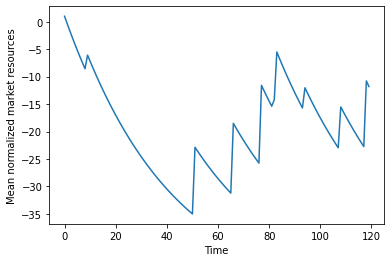

In [6]:
plt.plot(np.mean(PFexample.history["mNrm"], axis=1))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

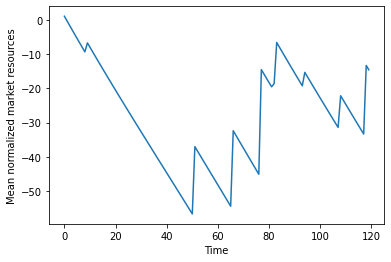

In [7]:
plt.plot(np.mean(PFexample.history["mNrm"] * PFexample.history["pLvl"], axis=1))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

/tmp/ipykernel_14820/947589964.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.mean(PFexample.history["mNrm"], axis=1) - np.min(np.mean(PFexample.history["mNrm"], axis=1))))


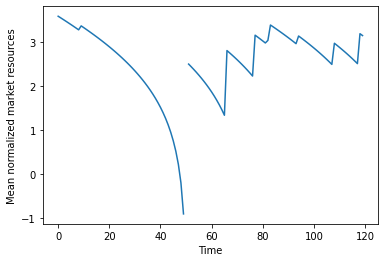

In [8]:
plt.plot(
    np.log(
        np.mean(PFexample.history["mNrm"], axis=1)
        - np.min(np.mean(PFexample.history["mNrm"], axis=1))
    )
)
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

In [9]:
PFexample.newborn_init_history["pLvl"][1, PFexample.history["who_dies"][1, :] > 0].shape

(0,)

In [10]:
PFexample.newborn_init_history["aNrm"][2, PFexample.history["who_dies"][2, :] > 0].shape

(0,)

## Using the Generic Monte Carlo Simulator

In [11]:
from HARK.distribution import Lognormal
import HARK.models.perfect_foresight_normalized as pfn
from HARK.simulation.monte_carlo import AgentTypeMonteCarloSimulator

In [12]:
pfn.model

{'shocks': {'live': <HARK.distribution.Bernoulli at 0x7f6482cab160>},
 'parameters': {'DiscFac': 0.96,
  'CRRA': (2.0,),
  'Rfree': 1.03,
  'LivPrb': 0.98,
  'PermGroFac': 1.01,
  'BoroCnstArt': None},
 'dynamics': {'p': <function HARK.models.perfect_foresight_normalized.<lambda>(PermGroFac, p)>,
  'r_eff': <function HARK.models.perfect_foresight_normalized.<lambda>(Rfree, PermGroFac)>,
  'b_nrm': <function HARK.models.perfect_foresight_normalized.<lambda>(r_eff, a_nrm)>,
  'm_nrm': <function HARK.models.perfect_foresight_normalized.<lambda>(b_nrm)>,
  'c_nrm': <HARK.model.Control at 0x7f6482cc5b40>,
  'a_nrm': <function HARK.models.perfect_foresight_normalized.<lambda>(m_nrm, c_nrm)>},
 'reward': {'u': <function HARK.models.perfect_foresight_normalized.<lambda>(c)>}}

In [13]:
pfn_simulator = AgentTypeMonteCarloSimulator(
    pfn.model["parameters"],
    pfn.model["shocks"],
    pfn.model["dynamics"],
    {"c_nrm": lambda m_nrm: PFexample.solution[0].cFunc(m_nrm)},
    {  # initial states
        "a_nrm": Lognormal(-6, 0),
        #'live' : 1,
        "p": 1.0,
    },
    agent_count=3,
    T_sim=120,
)

In [14]:
pfn_simulator.read_shocks = True
# pfn_simulator.shock_history['live'] = 1 - np.roll(PFexample.history["who_dies"], -1)

pfn_simulator.shock_history["live"] = 1 - PFexample.history["who_dies"]

In [15]:
pfn_simulator.newborn_init_history["a_nrm"] = PFexample.newborn_init_history["aNrm"]
pfn_simulator.newborn_init_history["p"] = PFexample.newborn_init_history["pLvl"]
# pfn_simulator.newborn_init_history['live'] = PFexample.newborn_init_history['pLvl']

In [16]:
# pf_simulator.track_vars = ["mNrm"]
pfn_simulator.initialize_sim()
pfn_simulator.simulate(sim_periods=120)

{'live': array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  0.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.

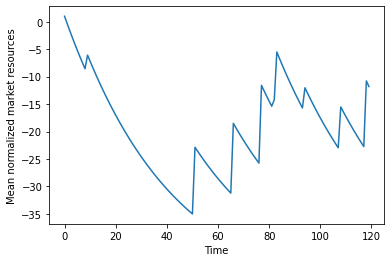

In [17]:
plt.plot(np.mean(pfn_simulator.history["m_nrm"], axis=1))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

/tmp/ipykernel_14820/2889722531.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.mean(pfn_simulator.history["m_nrm"], axis=1) - np.min(np.mean(pfn_simulator.history["m_nrm"], axis=1))))


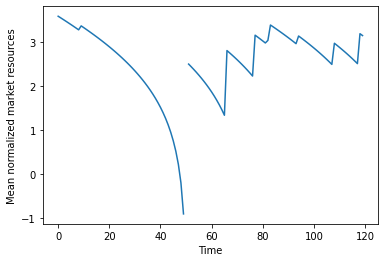

In [18]:
plt.plot(
    np.log(
        np.mean(pfn_simulator.history["m_nrm"], axis=1)
        - np.min(np.mean(pfn_simulator.history["m_nrm"], axis=1))
    )
)
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

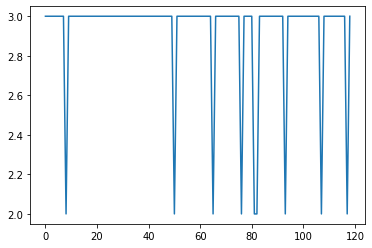

In [19]:
plt.plot(pfn_simulator.history["live"].sum(axis=1))

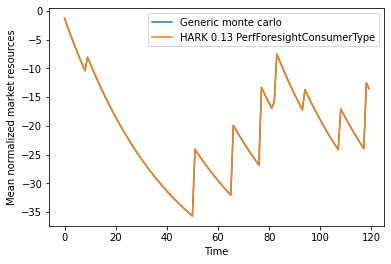

In [20]:
plt.plot(np.mean(pfn_simulator.history["a_nrm"], axis=1), label="Generic monte carlo")
plt.plot(
    np.mean(PFexample.history["aNrm"], axis=1),
    label="HARK 0.13 PerfForesightConsumerType",
)
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.legend()
plt.show()

In [21]:
np.mean(pfn_simulator.history["a_nrm"], axis=1) - np.mean(
    PFexample.history["aNrm"], axis=1
)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [22]:
np.where(pfn_simulator.history["live"] < 1)

(array([  8,  50,  65,  76,  81,  82,  93, 107, 117]),
 array([2, 1, 2, 0, 0, 1, 0, 1, 2]))

In [23]:
np.where(1 - PFexample.history["who_dies"] < 1)

(array([  8,  50,  65,  76,  81,  82,  93, 107, 117]),
 array([2, 1, 2, 0, 0, 1, 0, 1, 2]))